# HTDMA notes

This file contains the important steps required for HTDMA

### The aim:
Kappa - a measure of a particles hygroscopicity, i.e. a particle's affinity for water.

# DDD TODO

---
## DMA

Here's a pretty good overview of how a DMA works

http://www.cas.manchester.ac.uk/restools/instruments/aerosol/differential/

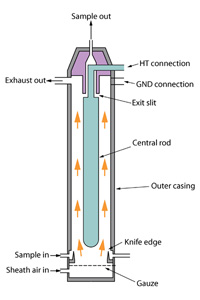

In [1]:
from IPython import display
display.Image("http://www.cas.manchester.ac.uk/images/photos/instruments/DMA.jpg")



A DMA is founded in a certain physical property known as *electrical mobility*. From Wikipedia:
>Electrical mobility is the ability of charged particles (such as electrons or protons) to move through a medium in response to an electric field that is pulling them.

A DMA separates (sorts, classifies, etc.) particles by their *electrical mobility*, denoted as $Z_p$ in the literature. **We will try to stick with the same variable names in Python!**

Electrical mobility, $Z_p$, is directly related to particle size, $d_p$; however, the transfer function to get $d_p$ from $Z_p$ is *not* straightforward, and has many, many variables at play.

### Important variables

The following is a list of the variables that the user will need to enter per experiment. It's quite possible that many of these will simply come from the file read in, and that we simply need to display the parameters for confirmation purposes.

* $Z_p^\star$ - center of electrical mobility - $cm^2/(V*sec)$
    * (area per volt*time)
* $\Delta Z_p$ - The full width half height of the center of mobility

Important variables needed to calculate electrical mobility

* $Q_{sh}$ - The clean sheath air inlet flow rate (lpm)
    * a.k.a. $Q_c$ in literature
* $Q_{aIn}$  - Aerosol inlet flow rate. (lpm)
    * DDD calls this the **polydisperse** flow in, a.k.a. $Q_a$
* $V$ - Voltage (volts)
    * This can range from 1-10000. Any range outside this should be flagged

If we are running in **asymmetric** mode, then the user needs to enter these as well:
* $Q_{excess}$ - Excess flow rate out. (lpm)
    * In symmetric mode, this is the same as $Q_{sh}$.
    * If asymmetric, then this needs to be specified.
* $Q_{aOut}$ - The aerosol sampling outlet flow rate. (lpm)
    * DDD calls this monodisperse flow out.
    * Again, in symmetric mode, this is the same as $Q_{aIn}$. a.k.a $Q_s$

DMA setup variables
* $r_{in}$ - inner radius of the DMA charge rod (aka $r_1$) (cm)
* $r_{out}$ - outer radius of the DMA housing (aka $r_2$) (cm)
* $L$ - length of the DMA classification region (cm)

Constraints / error checking

* If symmetric, then $Q_{aIn} == Q_{aOut}$ and $Q_{sh} == Q_{excess}$
* In all modes, $Q_{sh} + Q_{aIn} == Q_{excess} + Q_{aOut}$
* V >= 1 && V <= 10000


In [2]:
# Experiment setup. Default will be symmetric flow rates
Q_sh = 10.0             # Sheath in flow rate
Q_aIn = 1.0             # Aerosol inlet flow (Polydisperse)
V = 3500.0              # Volts (allow 1-10000, anything else should be flagged)

IS_SYMMETRIC = True

# If user chooses asymmetric flows then these two need to appear as well, otherwise, they are matched as indicated:
if IS_SYMMETRIC:
    Q_excess = Q_sh
    Q_aOut = Q_aIn
else:
    # User will need to enter these if in asymmetric mode
    Q_excess = 10.0
    Q_aOut = 1.0

In [3]:
def validate_setup():
    """
    This function will validate all user entries before any analysis
    is completed.

    :raises: ValueError if any value is not correct

    :return:
    """
    if IS_SYMMETRIC:
        if Q_aIn != Q_aOut or Q_sh != Q_excess:
            raise ValueError("Symmetric flows not matching!")
    if Q_sh + Q_aIn != Q_excess + Q_aOut:
        raise ValueError("Mismatched inlet and outlet flows!")
    if V < 1 or V > 10000:
        raise ValueError("Voltage setting out of range")

validate_setup()

In [4]:
# Advanced settings only. DMA parameters need to be specified.
# These are obtained from Table 1 in Collins et al (2004) - "The Scanning DMA Transfer Function.
DMA_Length_cm = 44.44       # L in paper
Radius_inner_cm = 0.937     # r1 in paper
Radius_outer_cm = 1.958     # r2 in paper

# Center of mobility (particle size)

### Unit conversions

It's important to note that the units are working in "cgs" i.e. cm/grams/sec

* Flows need to be in cm^3/sec. This conversion is lpm*1000/60

## Equations

These equations are from Stolzenburg and McMurry (2008):

### $Z_p^* = \frac{Q_{sh} + Q_{excess}}{4 \pi \Delta \phi}$

### $\Delta Z_p = Z_p^* \frac{Q_{aIn} + Q_{aOut}}{Q_{sh} + Q_{excess}}$

$\Delta \phi$ is defined as the change in the electrical flux from the aerosol inlet to the outlet for axial flow DMA:

### $\Delta \phi = \frac{LV}{ln(\frac{r_2}{r_1})}$

The electrical mobility, $Zp$ is related to particle diameter, $d_p$ by using Stokes' law, and is defined as follows:

## $Z_p = \frac{neC_c}{3 \pi \mu d_p}$

Solving for $d_p$

## $d_p = \frac{neC_c}{3 \pi \mu Z_p}$

where:
* $n$ - number of elementary charge units
  * The default is 1.
  * 2 for two peaks.
* $e$ - elementary unit of chart ($1.602 \times 10^{-19}$ C)
  *  C is a unit - Coulomb, which is always specified in M-kg-sec world. We work in cm-g-sec, so this value must be multiplied by $10^5$
* $C_c$ - Cunningham slip correction factor
  * def is 2
* $\mu$ - gas viscosity
  * 0.00183 poise, or just p
  * units = g/(cm * sec)

This gives a result for $d_p$ in cm. So, must multiply by another $10^7$ to get nanometers.

### Cunningham Slip Correction:

The Cunningham slip correction factor is a function of the particle Knudsen number, $Kn$, and is defined as :

$C_c = 1 + \frac{\lambda}{d_p}[2.34 + 1.05 exp(-0.39 * \frac{d_p}{\lambda} ]$

where:
* $\lambda$ - the *mean free path* of a gas molecule and is $0.066$ $\mu m$, or $6.64 e^{-6}$ cm. This value is dependent on temperature of 20 C and 1 atm.
* $d_p$ - particle diameter





These equations are from Collins et al (2004) *The Scanning DMA Transfer Function*:

$Z_p^* = \frac{Q_{sh}ln\frac{r_2}{r_1}}{2\pi LV}$

$\Delta Z_p = Z_p^* \frac{Q_a}{Q_{sh}}$

## $Z_p$ to $d_p$

In [5]:
import numpy as np
import scipy
import pandas as pd
import matplotlib as mpl
import seaborn as sns
import math

In [6]:
def lpm_to_cm3_per_sec(lpm):
    return lpm*1000/60

def compute_Zp(Q_sh, Q_aIn, Q_excess, Q_aOut, V):
    """
    Compute Zp - the center of electrical mobility, and the full width
    half height value (fwhh)

    All flows are specified in lpm

    :param Q_sh:     Sheath inlet flow rate
    :param Q_aIn:    Aerosol inlet (polydisperse) flow rate
    :param Q_excess: Excess outlet flow out
    :param Q_aOut:   Aerosol outlet (monodisperse) flow rate
    :param V:        Voltage (V)

    :return: (Zp, full_width_half_height)
    """
    delta_axial = (DMA_Length_cm * V) / np.log(Radius_outer_cm/Radius_inner_cm)
    Q_sh_corr = lpm_to_cm3_per_sec(Q_sh)
    Q_excess_corr = lpm_to_cm3_per_sec(Q_excess)
    Q_aIn_corr = lpm_to_cm3_per_sec(Q_aIn)
    Q_aOut_corr = lpm_to_cm3_per_sec(Q_aOut)
    Zp_center  = (Q_sh_corr + Q_excess_corr) / (4 * math.pi * delta_axial)
    Zp_fwhh    = (Q_aIn_corr + Q_aOut_corr) / (Q_sh_corr + Q_excess_corr) * Zp_center
    return (Zp_center, Zp_fwhh)

In [7]:
# ELEM_CHARGE is the elementary charge of a particle in Columb.
# Columb is in m-kg-sec, so multiply by 10e5 to get in our cm-g-sec
ELEM_CHARGE = 1.602e-19 * 10e5

# MU_GAS_VISCOSITY is normal air at 20 deg C and 1 atm
# Specified in Poise, where P is g / (cm*sec)
MU_GAS_VISCOSITY = 0.0001837

def Zp_to_Dp(Zp,Cs = 2,n_ch = 1):
    """
    This function computes the particle diameter Dp in nanometers from
    electrical mobility Zp.

    This calculation is all from DMA literature based on quite a number
    of variables. However, what we're going to do is a bit of a
    kludgy close approximation in the Cunningham slip correction, Cs.
    It itself a function of Dp, thus making this equation rather
    non-straightforward to compute.

    :param Zp:      center of electrical mobility
    :param Cs:      Cunningham slip correction
    :param n_ch:    number of elementary charges on particle
    :return:        The particle diameter Dp related to the specified Zp
    """

    Dp = (n_ch * ELEM_CHARGE * Cs) / (3 * math.pi * MU_GAS_VISCOSITY * Zp)
    Dp *= 10e7  # Convert from cm to nm
    return Dp

In [8]:
# lambda is the mean free path of a gas molecule, value is in nanometers
MEAN_FREE_PATH_STP = 68  # nm at standard temp and 1 atm

def Cunningham_slip_correction(dp):
    """
    Compute the Cunningham slip correction factor based on a specified
    particle diameter, dp, specified in nanometers.
    """

    Cs = 1 + (MEAN_FREE_PATH_STP / dp) * \
         (2.34 + 1.05*math.exp(-0.39 * (dp/MEAN_FREE_PATH_STP)))
    return Cs

In [9]:
(Zp, Zp_fwhh) = compute_Zp(Q_sh,Q_aIn,Q_excess,Q_aOut,V)
print("Zp = {}, Zp_fwhh = {}".format(Zp,Zp_fwhh))

Cs = 2  # Initial value for Cs
dp = Zp_to_Dp(Zp,Cs=2)
print("Dp (init value, Cs = 2) = {}".format(dp))

for i in range(10):
    Cs = Cunningham_slip_correction(dp)
    dp = Zp_to_Dp(Zp,Cs=Cs)
    print("Cs (pass {}) = {}".format(i+1,Cs))
    print("Dp (pass {}) = {}".format(i+1,dp))


Zp = 0.0001256873723407548, Zp_fwhh = 1.2568737234075483e-05
Dp (init value, Cs = 2) = 147.23822622076216
Cs (pass 1) = 2.2891158397403464
Dp (pass 1) = 168.52267792860954
Cs (pass 2) = 2.1053746198249286
Dp (pass 2) = 154.995812276617
Cs (pass 3) = 2.2159794621090114
Dp (pass 3) = 163.13844267128474
Cs (pass 4) = 2.147077900007681
Dp (pass 4) = 158.06597077746497
Cs (pass 5) = 2.1891200511839095
Dp (pass 5) = 161.16107666031147
Cs (pass 6) = 2.1631344108351676
Dp (pass 6) = 159.24803686423175
Cs (pass 7) = 2.1790698554034167
Dp (pass 7) = 160.42119016036588
Cs (pass 8) = 2.1692499917523684
Dp (pass 8) = 159.69826050751084
Cs (pass 9) = 2.1752832475128163
Dp (pass 9) = 160.14242344576311
Cs (pass 10) = 2.1715696421701494
Dp (pass 10) = 159.869031113994
